# Notes for Credit Risk Modelling

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [44]:
cr_loan = pd.read_csv('data/cr_loan2.csv')

In [45]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


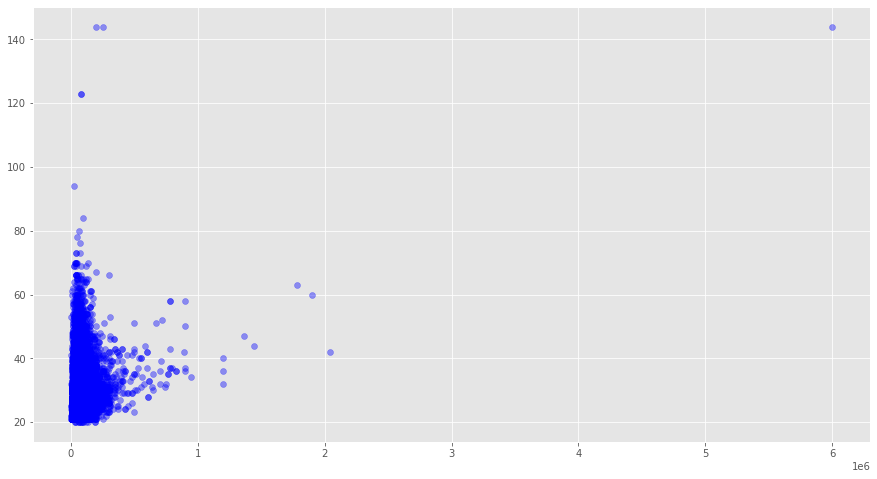

In [46]:
plt.scatter(cr_loan['person_income'], cr_loan['person_age'], color='blue', alpha=0.4)

#### Create a cross table of the loan intent and loan status

In [47]:
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


#### Create a cross table of home ownership, loan status, and grade

In [48]:
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

#### Create a cross table of home ownership, loan status, and average percent income

In [49]:

pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
                  values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


#### Created a boxplot 

Text(0.5, 0.98, '')

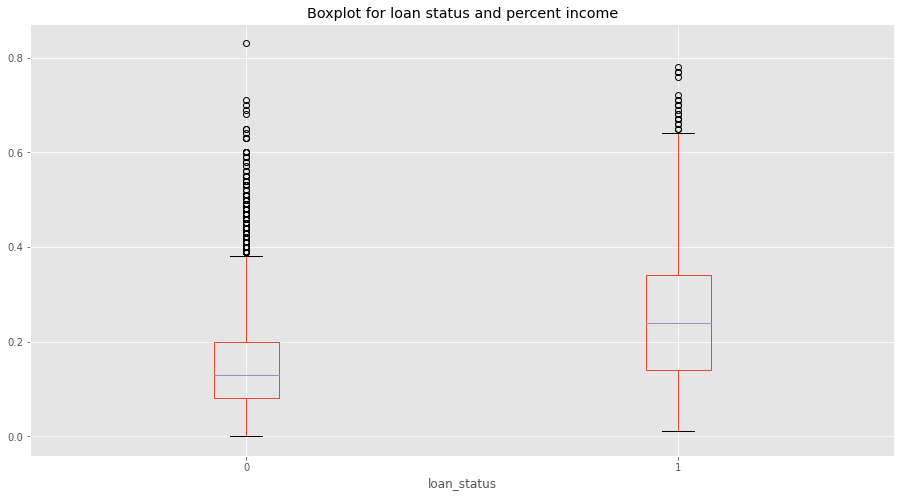

In [50]:
cr_loan.boxplot(column = ['loan_percent_income'], by='loan_status')
plt.title('Boxplot for loan status and percent income')
plt.suptitle('')

#### Dropping outliers

In [51]:
indices = cr_loan[cr_loan['person_emp_length']>=60].index

In [52]:
cr_loan.drop(indices, inplace=True)

Text(0, 0.5, 'Loan Interest rate')

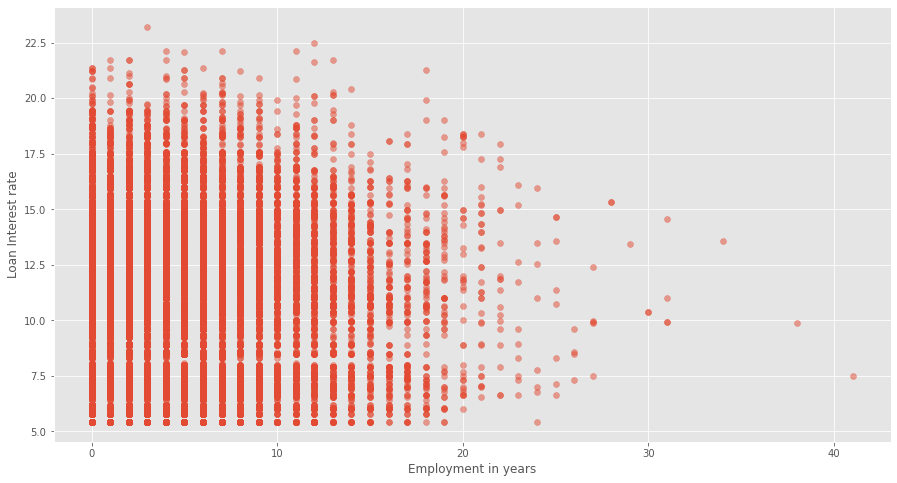

In [53]:
plt.style.use('ggplot')
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_int_rate'], alpha=0.5)
plt.xlabel('Employment in years')
plt.ylabel('Loan Interest rate')

Text(0, 0.5, 'Loan Interest Rate')

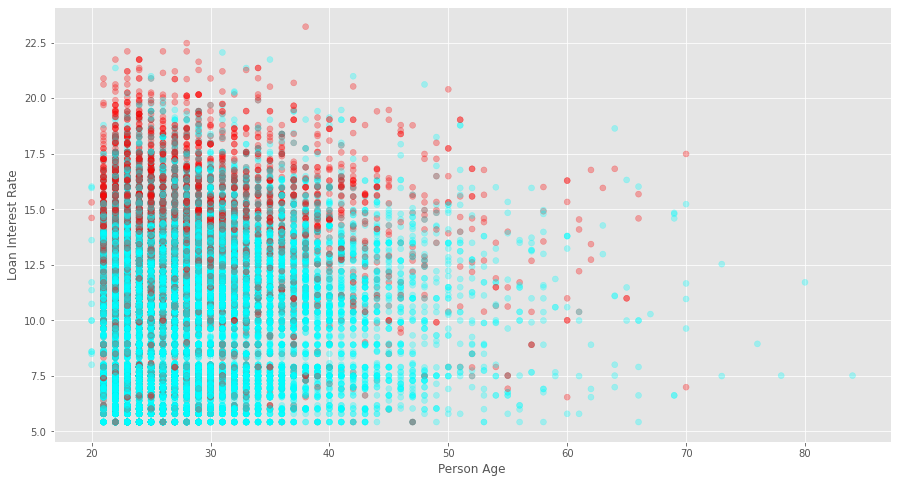

In [54]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["cyan","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.3)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")

#### Dealing with missing values

In [55]:
null_col = cr_loan.columns[cr_loan.isnull().any()]

In [56]:
cr_loan[null_col].isnull().sum()

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [57]:
# Print the number of nulls
cr_loan['loan_int_rate'].isnull().sum()

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index
indices_2 = cr_loan[cr_loan['loan_status'].isnull()].index
# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)
cr_clean = cr_loan_clean.drop(indices_2)

cr_clean['person_emp_length'].fillna((cr_clean['person_emp_length'].mean()), inplace=True)

In [58]:
cr_clean.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Logistic regression for predicting the probability of default

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
X_multi = cr_clean[['loan_int_rate', 'person_income']]
y_sing = cr_clean[['loan_status']]

In [61]:
clf_logistic = LogisticRegression(solver='lbfgs')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_sing, test_size=0.4, random_state=123)

In [63]:
clf_logistic.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [64]:
clf_logistic.intercept_

array([-0.00059118])

This gives the coefficient for equation 1/1+e^-y

In [65]:
clf_logistic.coef_

array([[ 7.75764443e-02, -3.67715610e-05]])

Text(0.5, 0.98, '')

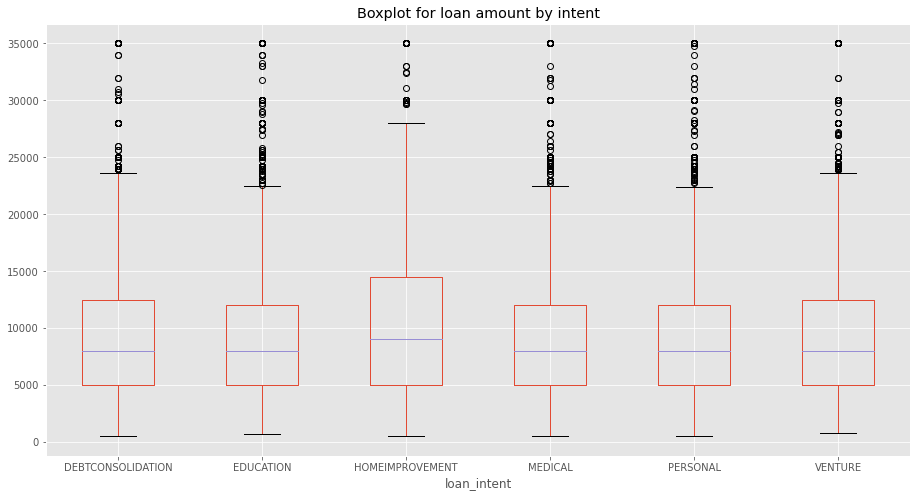

In [66]:
plt.rcParams["figure.figsize"] = (15,8)
cr_loan.boxplot(column = ['loan_amnt'], by='loan_intent')
plt.title('Boxplot for loan amount by intent')
plt.suptitle('')

#### Separate int from object for one hot encoding

In [67]:
cred_num = cr_clean.select_dtypes(exclude=['object'])
cred_char = cr_clean.select_dtypes(include=['object'])

One hot encode the character columns

In [68]:
cred_char_encode = pd.get_dummies(cred_char)

In [69]:
cr_clean = pd.concat([cred_num,  cred_char_encode], axis=1)

In [70]:
cr_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29463 entries, 1 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      29463 non-null  int64  
 1   person_income                   29463 non-null  int64  
 2   person_emp_length               29463 non-null  float64
 3   loan_amnt                       29463 non-null  int64  
 4   loan_int_rate                   29463 non-null  float64
 5   loan_status                     29463 non-null  int64  
 6   loan_percent_income             29463 non-null  float64
 7   cb_person_cred_hist_length      29463 non-null  int64  
 8   person_home_ownership_MORTGAGE  29463 non-null  uint8  
 9   person_home_ownership_OTHER     29463 non-null  uint8  
 10  person_home_ownership_OWN       29463 non-null  uint8  
 11  person_home_ownership_RENT      29463 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

In [71]:
X_inputs = cr_clean[['loan_int_rate', 'person_income', 'person_emp_length', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']]
y_output = cr_clean[['loan_status']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_inputs, y_output, test_size=0.3, random_state=42)

In [73]:
clf_logistic = LogisticRegression(solver='lbfgs')

In [74]:
clf_logistic.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [75]:
clf_logistic.intercept_

array([-1.69379622])

In [76]:
clf_logistic.coef_

array([[ 2.15227782e-01, -2.74888102e-05, -4.15249547e-02,
         3.85715784e-01, -9.78390375e-01,  3.65935018e-01,
         2.22270917e-02, -4.41580454e-01, -1.04766085e+00]])

In [77]:
prediction_of_probability = clf_logistic.predict_proba(X_test)

In [78]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8839 entries, 14136 to 6958
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_int_rate                  8839 non-null   float64
 1   person_income                  8839 non-null   int64  
 2   person_emp_length              8839 non-null   float64
 3   loan_intent_DEBTCONSOLIDATION  8839 non-null   uint8  
 4   loan_intent_EDUCATION          8839 non-null   uint8  
 5   loan_intent_HOMEIMPROVEMENT    8839 non-null   uint8  
 6   loan_intent_MEDICAL            8839 non-null   uint8  
 7   loan_intent_PERSONAL           8839 non-null   uint8  
 8   loan_intent_VENTURE            8839 non-null   uint8  
dtypes: float64(2), int64(1), uint8(6)
memory usage: 328.0 KB


#### This is how you add the predicted column in the data frame.

#### Accuracy of test set

In [79]:
clf_logistic.score(X_test, y_test)

0.8095938454576309

#### ROC curve to check the performance of the model

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [235]:
fallout, sensitivity, thresholds = roc_curve(y_test, clf_logistic.predict_proba(X_test))

ValueError: y should be a 1d array, got an array of shape (8839, 2) instead.